# 通过量子神经网络对鸢尾花进行分类

[https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.8/classification_of_iris_by_qnn.html](https://www.mindspore.cn/mindquantum/docs/zh-CN/r0.8/classification_of_iris_by_qnn.html)

In [33]:
import numpy as np                                        # 导入numpy库并简写为np
from sklearn import datasets                              # 导入datasets模块，用于加载鸢尾花的数据集

iris_dataset = datasets.load_iris()                       # 加载鸢尾花的数据集，并存在iris_dataset

print(iris_dataset.data.shape)                            # 打印iris_dataset的样本的数据维度
print(iris_dataset.feature_names)                         # 打印iris_dataset的样本的特征名称
print(iris_dataset.target_names)                          # 打印iris_dataset的样本包含的亚属名称
print(iris_dataset.target)                                # 打印iris_dataset的样本的标签的数组
print(iris_dataset.target.shape)                          # 打印iris_dataset的样本的标签的数据维度

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


In [71]:
# 构造一个二分类数据集合
#cls = [0, 1]    # this is easy
cls = [1, 2]    # this is harder

slicers = {
    0: slice(0,   50),
    1: slice(50,  100),
    2: slice(100, 150),
}
cls.sort()
X = np.concatenate([iris_dataset.data[slicers[i], :].astype(np.float32) for i in cls], axis=0)
y = np.concatenate([iris_dataset.target[slicers[i]].astype(int)      for i in cls], axis=0)
y = [cls.index(e) for e in y]                       # remap y to [0, 1]

X_feature_names = iris_dataset.feature_names        # 将iris_dataset的特征名称储存在X_feature_names中
y_target_names = iris_dataset.target_names[cls]     # 选取iris_dataset的target_names，并储存在y_target_names中

print(X.shape)                                      # 打印样本的数据维度
print(X_feature_names)                              # 打印样本的特征名称
print(y_target_names)                               # 打印样本包含的亚属名称
print(y)                                            # 打印样本的标签的数组
print(y.shape)                                      # 打印样本的标签的数据维度

(100, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['versicolor' 'virginica']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


AttributeError: 'list' object has no attribute 'shape'

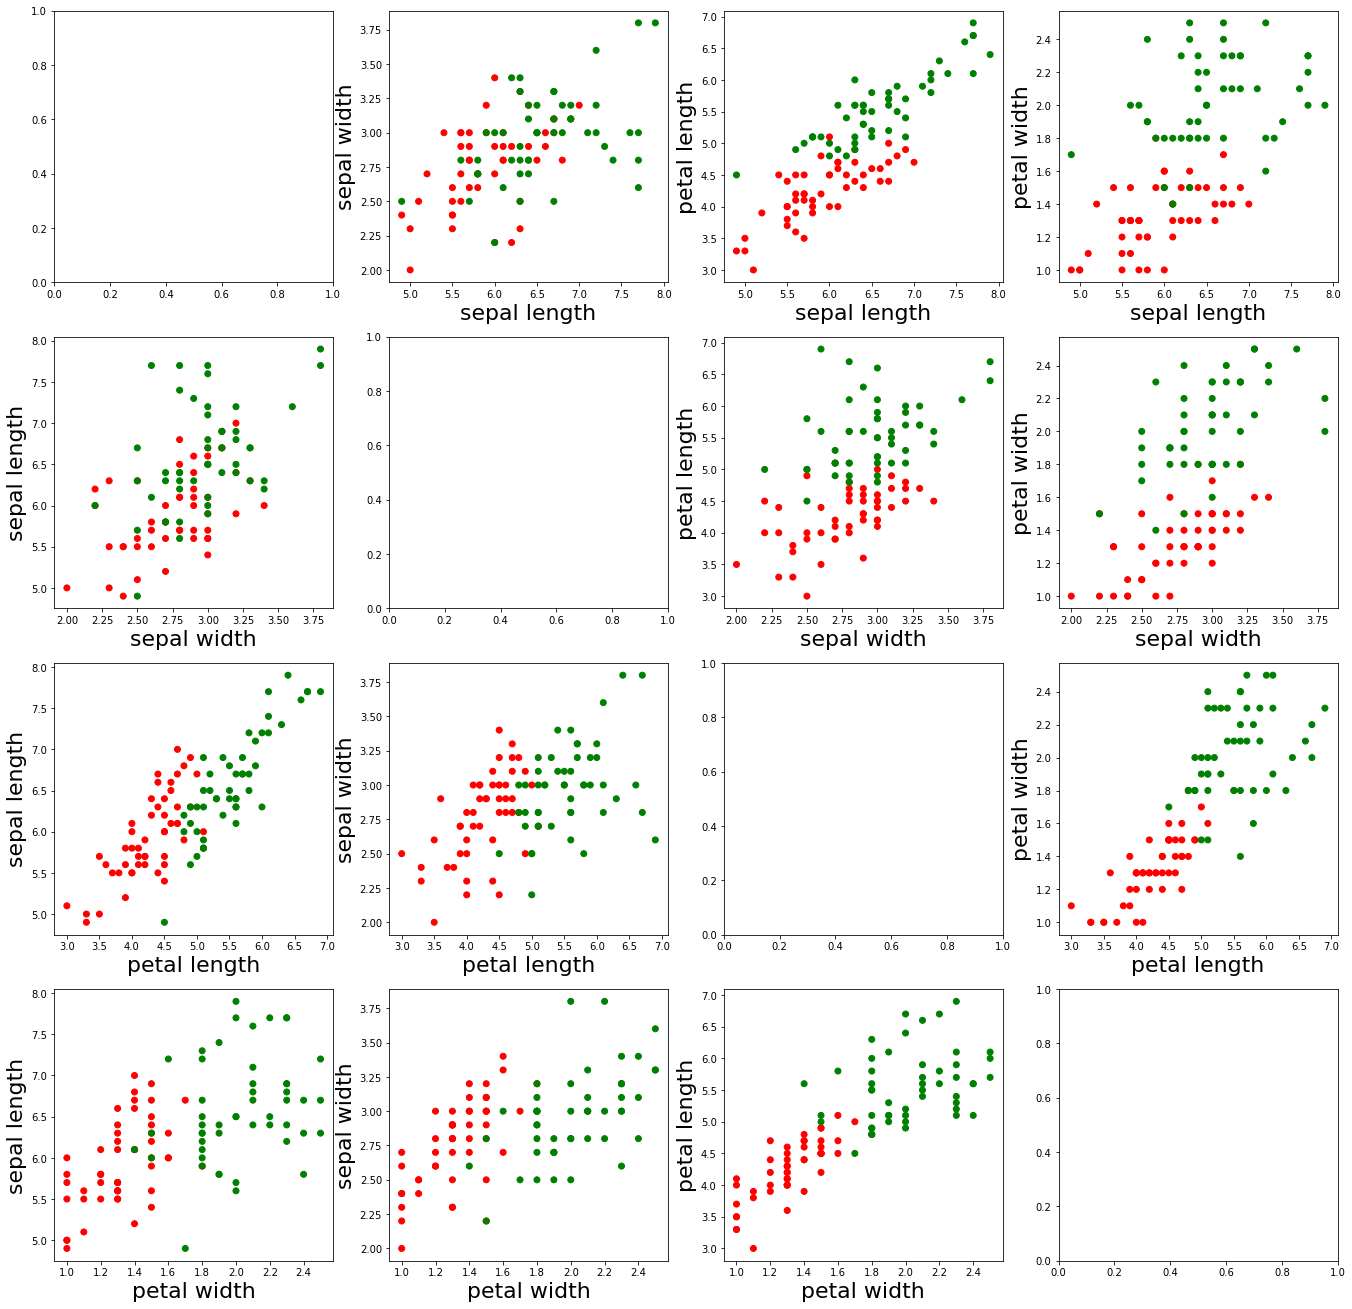

In [35]:
import matplotlib.pyplot as plt                                                           # 导入matplotlib.pyplot模块并简写为plt

feature_name = {0: 'sepal length', 1: 'sepal width', 2: 'petal length', 3: 'petal width'} # 将不同的特征名称分别标记为0,1,2,3
axes = plt.figure(figsize=(23, 23)).subplots(4, 4)                                        # 画出一个大小为23*23的图，包含4*4=16个子图

colormap = {0: 'r', 1: 'g'}                                                               # 将标签为0的样本设为红色，标签为1的样本设为绿色
cvalue = [colormap[i] for i in y]                                                         # 将100个样本对应的标签设置相应的颜色

for i in range(4):
    for j in range(4):
        if i != j:
            ax = axes[i][j]                                                               # 在[i][j]的子图上开始画图
            ax.scatter(X[:, i], X[:, j], c=cvalue)                                        # 画出第[i]个特征和第[j]个特征组成的散点图
            ax.set_xlabel(feature_name[i], fontsize=22)                                   # 设置X轴的名称为第[i]个特征名称，字体大小为22
            ax.set_ylabel(feature_name[j], fontsize=22)                                   # 设置Y轴的名称为第[j]个特征名称，字体大小为22
plt.show()                                                                                # 渲染图像，即呈现图像

In [36]:
alpha = X[:, :3] * X[:, 1:]           # 每一个样本中，利用相邻两个特征值计算出一个参数，即每一个样本会多出3个参数（因为有4个特征值），并储存在alpha中
X = np.append(X, alpha, axis=1)       # 在axis=1的维度上，将alpha的数据值添加到X的特征值中

print(X.shape)                        # 打印此时X的样本的数据维度

(100, 7)


In [37]:
from sklearn.model_selection import train_test_split                                                   # 导入train_test_split函数，用于对数据集进行划分

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True) # 将数据集划分为训练集和测试集

print(X_train.shape)                                                                                   # 打印训练集中样本的数据类型
print(X_test.shape)                                                                                    # 打印测试集中样本的数据类型

(80, 7)
(20, 7)


In [59]:
from mindquantum.core.circuit import Circuit         # 导入Circuit模块，用于搭建量子线路
from mindquantum.core.circuit import UN              # 导入UN模块
from mindquantum.core.gates import H, X, RZ          # 导入量子门H, X, RZ

encoder = Circuit()                                  # 初始化量子线路 (IPQ编码)
encoder += UN(H, 4)                                  # H门作用在每1位量子比特
for i in range(4):                                   # i = 0, 1, 2, 3
    encoder += RZ(f'alpha{i}').on(i)                 # RZ(alpha_i)门作用在第i位量子比特
for j in range(3):                                   # j = 0, 1, 2
    encoder += X.on(j+1, j)                          # X门作用在第j+1位量子比特，受第j位量子比特控制
    encoder += RZ(f'alpha{j+4}').on(j+1)             # RZ(alpha_{j+4})门作用在第0位量子比特
    encoder += X.on(j+1, j)                          # X门作用在第j+1位量子比特，受第j位量子比特控制
encoder = encoder.no_grad()                          # Encoder作为整个量子神经网络的第一层，不用对编码线路中的梯度求导数，因此加入no_grad()
encoder.summary()                                    # 总结Encoder


from mindquantum.algorithm.nisq import HardwareEfficientAnsatz                                      # 导入HardwareEfficientAnsatz
from mindquantum.core.gates import RY, RX                                                           # 导入量子门RY

ansatz = HardwareEfficientAnsatz(4, single_rot_gate_seq=[RX, RY], entangle_gate=X, depth=3).circuit     # 通过HardwareEfficientAnsatz搭建Ansatz
ansatz.summary()                                                                                    # 总结Ansatz


circuit = encoder.as_encoder() + ansatz.as_ansatz()     # 完整的量子线路由Encoder和Ansatz组成
circuit.summary()
circuit.svg()

=================================Circuit Summary=================================
|Total number of gates  : 17.                                                   |
|Parameter gates        : 7.                                                    |
|with 7 parameters are  :                                                       |
|alpha0, alpha1, alpha2, alpha3, alpha4, alpha5, alpha6                        .|
|Number qubit of circuit: 4                                                     |
===================================================Circuit Summary===================================================
|Total number of gates  : 41.                                                                                       |
|Parameter gates        : 32.                                                                                       |
|with 32 parameters are :                                                                                           |
|d0_n0_0, d0_n0_1, d0_n1_0, d0_n1_1,

In [60]:
from mindquantum.core.operators import QubitOperator           # 导入QubitOperator模块，用于构造泡利算符
from mindquantum.core.operators import Hamiltonian             # 导入Hamiltonian模块，用于构建哈密顿量

hams = [Hamiltonian(QubitOperator(f'Z{i}')) for i in [2, 3]]   # 分别对第2位和第3位量子比特执行泡利Z算符测量，且将系数都设为1，构建对应的哈密顿量
for h in hams:
    print(h)

1 [Z2] 
1 [Z3] 


In [61]:
import mindspore as ms                                                         # 导入mindspore库并简写为ms
from mindquantum.framework import MQLayer                                      # 导入MQLayer
from mindquantum.simulator import Simulator

ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")
ms.set_seed(42)                                                                # 设置生成随机数的种子
sim = Simulator('mqvector', circuit.n_qubits)
grad_ops = sim.get_expectation_with_grad(hams, circuit, parallel_worker=5)
QuantumNet = MQLayer(grad_ops)                                                 # 搭建量子神经网络
QuantumNet

MQLayer<
  (evolution): MQOps<4 qubits mqvector VQA Operator>
  >

In [62]:
from mindspore.nn import SoftmaxCrossEntropyWithLogits                         # 导入SoftmaxCrossEntropyWithLogits模块，用于定义损失函数
from mindspore.nn import Adam                                                  # 导入Adam模块用于定义优化参数
import mindspore as ms
from mindspore.dataset import NumpySlicesDataset                               # 导入NumpySlicesDataset模块，用于创建模型可以识别的数据集

try:
    from mindspore.train import Accuracy                                       # 导入Accuracy模块，用于评估预测准确率
except ImportError:
    from mindspore.nn import Accuracy

loss = SoftmaxCrossEntropyWithLogits(sparse=True, reduction='mean')            # 通过SoftmaxCrossEntropyWithLogits定义损失函数，sparse=True表示指定标签使用稀疏格式，reduction='mean'表示损失函数的降维方法为求平均值
opti = Adam(QuantumNet.trainable_params(), learning_rate=0.1)                  # 通过Adam优化器优化Ansatz中的参数，需要优化的是Quantumnet中可训练的参数，学习率设为0.1

model = ms.Model(QuantumNet, loss, opti, metrics={'Acc': Accuracy()})          # 建立模型：将MindQuantum构建的量子机器学习层和MindSpore的算子组合，构成一张更大的机器学习网络

train_loader = NumpySlicesDataset({'features': X_train, 'labels': y_train}, shuffle=False).batch(5) # 通过NumpySlicesDataset创建训练样本的数据集，shuffle=False表示不打乱数据，batch(5)表示训练集每批次样本点有5个
test_loader = NumpySlicesDataset({'features': X_test, 'labels': y_test}).batch(5)                   # 通过NumpySlicesDataset创建测试样本的数据集，batch(5)表示测试集每批次样本点有5个


class StepAcc(ms.Callback):                                                      # 定义一个关于每一步准确率的回调函数
    def __init__(self, model, test_loader):
        self.model = model
        self.test_loader = test_loader
        self.acc = []

    def on_train_step_end(self, run_context):
        self.acc.append(self.model.eval(self.test_loader, dataset_sink_mode=False)['Acc'])


monitor = ms.LossMonitor(16)                                                      # 监控训练中的损失，每16步打印一次损失值
acc = StepAcc(model, test_loader)                                                 # 使用建立的模型和测试样本计算预测的准确率
model.train(50, train_loader, callbacks=[monitor, acc], dataset_sink_mode=False)  # 将上述建立好的模型训练20次


epoch: 1 step: 16, loss is 0.5701492428779602
epoch: 2 step: 16, loss is 0.4651659429073334
epoch: 3 step: 16, loss is 0.4628600478172302
epoch: 4 step: 16, loss is 0.4541800618171692
epoch: 5 step: 16, loss is 0.4333617091178894
epoch: 6 step: 16, loss is 0.4430478513240814
epoch: 7 step: 16, loss is 0.4426330626010895
epoch: 8 step: 16, loss is 0.440075159072876
epoch: 9 step: 16, loss is 0.43551045656204224
epoch: 10 step: 16, loss is 0.43786460161209106
epoch: 11 step: 16, loss is 0.4505181312561035
epoch: 12 step: 16, loss is 0.4498741030693054
epoch: 13 step: 16, loss is 0.4481847882270813
epoch: 14 step: 16, loss is 0.4477812647819519
epoch: 15 step: 16, loss is 0.446439266204834
epoch: 16 step: 16, loss is 0.4455296993255615
epoch: 17 step: 16, loss is 0.44616761803627014
epoch: 18 step: 16, loss is 0.4462679326534271
epoch: 19 step: 16, loss is 0.4462055563926697
epoch: 20 step: 16, loss is 0.4465271532535553
epoch: 21 step: 16, loss is 0.4465646743774414
epoch: 22 step: 16, l

Text(0, 0.5, 'Accuracy')

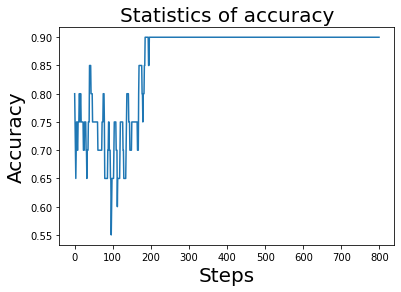

In [63]:
plt.plot(acc.acc)
plt.title('Statistics of accuracy', fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)

In [64]:
from mindspore import ops                                                    # 导入ops模块

predict = np.argmax(ops.Softmax()(model.predict(ms.Tensor(X_test))), axis=1)    # 使用建立的模型和测试样本，得到测试样本预测的分类
correct = model.eval(test_loader, dataset_sink_mode=False)                   # 计算测试样本应用训练好的模型的预测准确率

print("预测分类结果：", predict)                                              # 对于测试样本，打印预测分类结果
print("实际分类结果：", y_test)                                               # 对于测试样本，打印实际分类结果

print(correct)                                                               # 打印模型预测的准确率

预测分类结果： [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
实际分类结果： [0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
{'Acc': 0.9}
